In [ ]:
#Referance
# https://www.youtube.com/watch?v=ZMudJXhsUpY&t=85s

# we need minimum 25gb ram to train this model

In [1]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [1]:
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import glob
filelist = glob.glob("dat/*.txt")

In [5]:
filelist

['dat/A Midsummer Nights Dream.txt',
 'dat/A Fairy Tale in Two Acts Taken from Shakespeare.txt',
 'dat/A Lover Complaint.txt',
 'dat/Cymbeline.txt',
 'dat/King Richard the Second.txt',
 'dat/Antony and Cleopatra.txt',
 'dat/BEAUTIFUL STORIES FROM SHAKESPEARE.txt',
 'dat/King Richard III.txt',
 'dat/As You Like It.txt',
 'dat/Pericles.txt',
 'dat/Shakspeares Mental Photographs.txt',
 'dat/Much Ado About Nothing.txt',
 "dat/Loues Labour's lost.txt",
 "dat/Shakespeare's Comedy of The Tempest.txt",
 'dat/Macbeth.txt',
 'dat/Measvre, For Measure.txt',
 'dat/The Famous History of the Life of King Henry the Eight.txt',
 'dat/The Comedy of Errors.txt',
 "dat/The Complete Works of William Shakespeare All's Well That Ends Well.txt",
 'dat/The Complete Works of William Shakespeare.txt',
 'dat/Sonnets to Sundry Notes of Music.txt',
 'dat/The First Part of Henry the Fourth.txt',
 'dat/The First Part of King Henry the Fourth.txt',
 'dat/The First Part of King Henry the Sixth.txt',
 'dat/The History 

In [5]:
text_data = []
for file in filelist:
    with open(file, "r",encoding='utf-8') as file:
      text_data.append(file.read())

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

In [7]:
word_idx = tokenizer.word_index #Last is the key
idx_word = tokenizer.index_word

In [8]:
word_counts = tokenizer.word_counts
num_words = len(word_counts)

In [9]:
sequences = tokenizer.texts_to_sequences(text_data)

In [15]:
print(sequences[0])

[8131, 147, 31765, 6, 5841, 5288, 1114, 28, 603, 498, 17, 1699, 11, 15, 1, 338, 5, 2734, 6047, 8, 1, 1174, 803, 2, 104, 124, 890, 5, 1, 162, 48, 34, 1026, 2, 13, 586, 34, 6895, 4290, 7, 72, 621, 14, 123, 14, 130, 38, 440, 338, 14, 433, 1, 703, 5, 1, 147, 152, 1008, 2821, 13, 17, 1699, 38, 3544, 48, 1979, 152, 1280, 35, 7, 36, 12, 3146, 8, 1, 1174, 803, 3819, 32, 3, 2033, 1, 1207, 5, 1, 699, 101, 7, 36, 3146, 132, 2211, 17, 1699, 748, 6, 5841, 5288, 1114, 1654, 603, 498, 2402, 1383, 10882, 10883, 371, 16096, 350, 8917, 15333, 3520, 15334, 2171, 563, 3147, 224, 13580, 13581, 1762, 1593, 5, 17, 147, 152, 1699, 6, 5841, 5288, 1114, 17, 371, 49, 1980, 28, 1, 3521, 498, 4781, 6, 4781, 5, 234, 746, 147, 152, 2246, 28805, 1618, 1980, 28, 16097, 550, 42463, 786, 944, 4359, 6, 5841, 5288, 1114, 28, 603, 498, 2613, 317, 4, 114, 4, 1312, 6, 715, 8, 1, 739, 5, 1688, 114, 348, 1, 343, 6, 715, 8, 6, 7983, 317, 348, 114, 4, 6, 1295, 568, 1312, 114, 348, 259, 203, 5, 1, 1295, 317, 375, 114, 4, 1, 1295,

In [12]:
len(sequences[0])

20739

In [10]:
input_sequences = []
for line in sequences:
	#token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, 1000):
		n_gram_sequence = line[:i+1]
		input_sequences.append(n_gram_sequence)

In [11]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=num_words)

In [36]:
model = Sequential()
model.add(Embedding(num_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(num_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
#print(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(xs, ys, epochs=5, verbose=1) #train for 10 epoch (run this cell 2 times)

Epoch 1/5
2123/2123 [==============================] - 430s 202ms/step - loss: 1.3781 - accuracy: 0.7427
Epoch 2/5
2123/2123 [==============================] - 431s 203ms/step - loss: 1.3233 - accuracy: 0.7547
Epoch 3/5
2123/2123 [==============================] - 431s 203ms/step - loss: 1.2578 - accuracy: 0.7646
Epoch 4/5
2123/2123 [==============================] - 434s 205ms/step - loss: 1.2008 - accuracy: 0.7762
Epoch 5/5
2123/2123 [==============================] - 435s 205ms/step - loss: 1.1780 - accuracy: 0.7809


In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

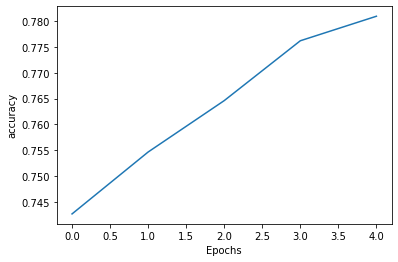

In [18]:
plot_graphs(history, 'accuracy')

In [17]:
model.save_weights("text_gen.h5")

In [34]:
seed_text = " THE COMPLETE WORKS OF WILLIAM"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
print(seed_text)

 THE COMPLETE WORKS OF WILLIAM shakespeare release date november 1998 you are usually created from multiple editions all project gutenberg to get of this etext file zip so bad be sure day of these all
